# <b>ADASYN for image generation/balancing dataset</b>

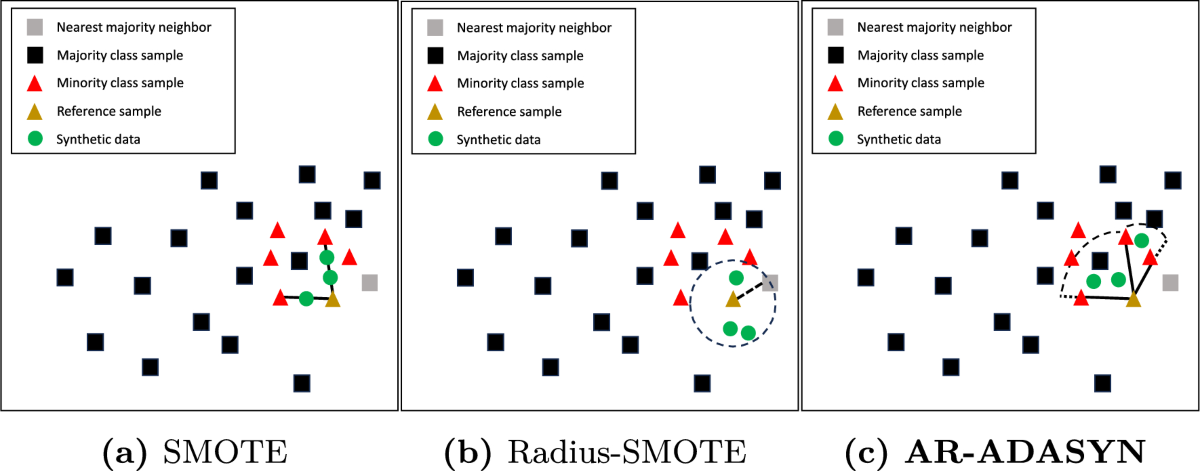

images[0] = [188 208 243 ... 139 135 170]

labels[0] = buildings

X/images: 
[[188 208 243 ... 139 135 170]
 [253 253 255 ...   9   9   9]
 [158 193 212 ...  73  71  72]
 ...
 [225 227 224 ...  87  90  95]
 [ 86 107 126 ... 148 173 170]
 [110 117 133 ... 152 155 162]]

y/labels: 
['buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' 'buildings'
 'buildings' 'buildings' 'buildings' 'buildings' 'buildings' '

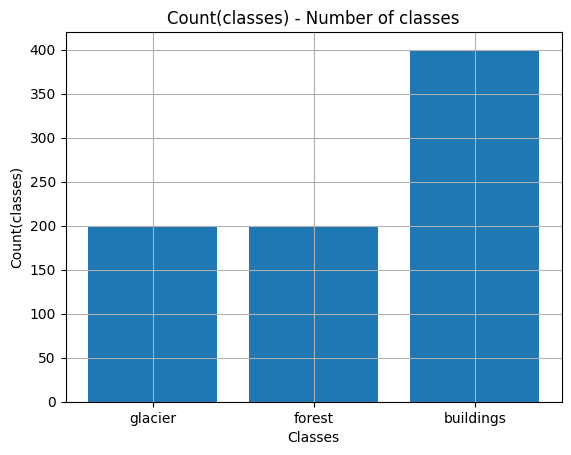

{'glacier': 200, 'forest': 395, 'buildings': 400}


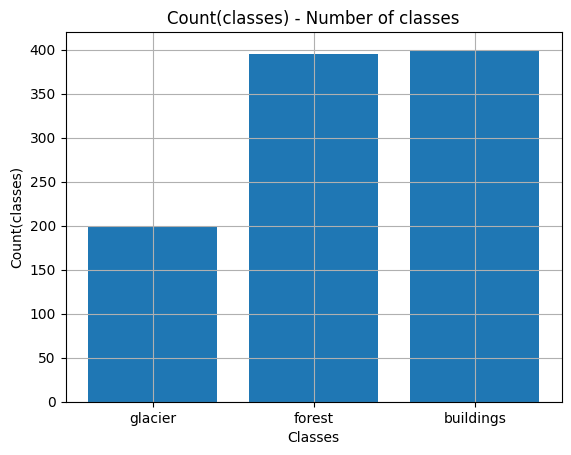

{'glacier': 200, 'forest': 395, 'buildings': 400}

In [28]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

class ImageADASYN:
    
    def __init__(self) -> None:
        self.label_encoder = LabelEncoder()
    
    """
    Fitting/loading the images and preprocessing to flatten vectors for SMOTE.
    """
    def fit(self, path_to_input_image_folder:str, width_of_image:int, height_of_image:int, debug:bool=False):
        self.X_images:list = []
        self.y_labels:list = []
        self.width_of_image = width_of_image
        self.height_of_image = height_of_image
        for file_name in os.listdir(path_to_input_image_folder):
            image = Image.open(f"{path_to_input_image_folder}/{file_name}")
            image = image.resize((self.width_of_image, self.height_of_image))
            image_array = np.array(image).flatten()
            self.X_images.append(image_array)
            self.y_labels.append(file_name.split('_')[0])  
        self.X_images = np.array(self.X_images)
        self.y_labels = np.array(self.y_labels)
        if debug:
            print(f"images[0] = {self.X_images[0]}\n")
            print(f"labels[0] = {self.y_labels[0]}\n")
            print(f"X/images: \n{self.X_images}\n")
            print(f"y/labels: \n{self.y_labels}\n")
            
    """
    Counting the number of classes and plotting the histogram
    """
    def count(self, path_to_image_folder:str, show_image=False):
        files = os.listdir(path_to_image_folder)
        names = []
        for file_name in files:
            name = file_name.split("_")[0]
            names.append(name)
        names = set(names)
        data = {}
        for i in names:
            data[i]=0
        for file_name in files:
            name = file_name.split("_")[0]
            data[name] = int(data[name])+1
        print(data)
        x = [value[0] for value in data.items()]
        y = [value[1] for value in data.items()]
        if show_image:
            plt.bar(x, y)
            plt.grid(True)
            plt.xlabel("Classes")
            plt.ylabel("Count(classes)")
            plt.title("Count(classes) - Number of classes")
            plt.show()
        return data
            
    """
    Balancing the dataset.
    """
    def balance(self, path_to_output_image_folder:str, number_of_neighbors = 5, debug=False):
        y_labels_encoded = self.label_encoder.fit_transform(self.y_labels)
        adasyn = ADASYN(sampling_strategy="minority", random_state=42, n_neighbors=number_of_neighbors)
        X_images_resampled, y_labels_resampled = adasyn.fit_resample(self.X_images, y_labels_encoded)
        if debug:
            print(f"Images resampled: \n{X_images_resampled}\n")
            print(f"Labels resampled: \n{y_labels_resampled}\n")
        if not os.path.exists(path_to_output_image_folder):
            os.makedirs(path_to_output_image_folder)
        for i in range(len(X_images_resampled)):
            image_array = X_images_resampled[i].reshape(self.width_of_image, self.height_of_image, 3)  
            image = Image.fromarray(np.uint8(image_array))
            label = self.label_encoder.inverse_transform([y_labels_resampled[i]])[0]
            file_name = f"{label}_{i}.png"
            image.save(f"{path_to_output_image_folder}/{file_name}")

##### CONFIGURATION #####    
path_to_input_image_folder = "./dataset/training-ADASYN/buildings+forest+glacier/"
path_to_output_image_folder = "./dataset/training-ADASYN/buildings+forest+glacier_balanced/"
width_of_image = 150
height_of_image = 150
number_of_neighbors = 10
#########################
    
image_adasyn = ImageADASYN()
image_adasyn.fit(path_to_input_image_folder=path_to_input_image_folder, width_of_image=width_of_image, height_of_image=height_of_image, debug=True)
image_adasyn.balance(path_to_output_image_folder=path_to_output_image_folder, number_of_neighbors=number_of_neighbors, debug=True)
image_adasyn.count(path_to_input_image_folder, show_image=True)
image_adasyn.count(path_to_output_image_folder, show_image=True)